## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理

def preproc_x(x, flatten=True):
    a = x.min()
    b = x.max()
    x = (x - a) / (b - a)
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y
    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
#建立神經網路

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
outp

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 19s 388us/step - loss: 2.0085 - acc: 0.2595 - val_loss: 1.8283 - val_acc: 0.3480
Epoch 2/100
50000/50000 [==============================] - 14s 278us/step - loss: 1.7733 - acc: 0.3606 - val_loss: 1.6964 - val_acc: 0.3927
Epoch 3/100
50000/50000 [==============================] - 14s 273us/step - loss: 1.6743 - acc: 0.3996 - val_loss: 1.6589 - val_acc: 0.4091
Epoch 4/100
50000/50000 [==============================] - 14s 274us/step - loss: 1.6081 - acc: 0.4263 - val_loss: 1.5709 - val_acc: 0.4388
Epoch 5/100
50000/50000 [==============================] - 14s 272us/step - loss: 1.5488 - acc: 0.4454 - val_loss: 1.5625 - val_acc: 0.4358
Epoch 6/100
50000/50000 [==============================] - 13s 269us/step - loss: 1.5015 - acc: 0.4638 - val_loss: 1.5149 - val_acc: 0.4515
Epoch 7/100
50000/50000 [==============================] - 13s

Epoch 57/100
50000/50000 [==============================] - 13s 261us/step - loss: 0.6112 - acc: 0.7815 - val_loss: 1.9170 - val_acc: 0.5133
Epoch 58/100
50000/50000 [==============================] - 13s 257us/step - loss: 0.6031 - acc: 0.7825 - val_loss: 1.9799 - val_acc: 0.5078
Epoch 59/100
50000/50000 [==============================] - 14s 272us/step - loss: 0.5970 - acc: 0.7871 - val_loss: 1.9823 - val_acc: 0.5122
Epoch 60/100
50000/50000 [==============================] - 13s 256us/step - loss: 0.5794 - acc: 0.7934 - val_loss: 2.0014 - val_acc: 0.5114
Epoch 61/100
50000/50000 [==============================] - 14s 273us/step - loss: 0.5994 - acc: 0.7830 - val_loss: 1.9999 - val_acc: 0.5154
Epoch 62/100
50000/50000 [==============================] - 14s 286us/step - loss: 0.5515 - acc: 0.8018 - val_loss: 2.0461 - val_acc: 0.5160
Epoch 63/100
50000/50000 [==============================] - 14s 273us/step - loss: 0.5609 - acc: 0.7971 - val_loss: 2.1548 - val_acc: 0.4994
Epoch 64/100


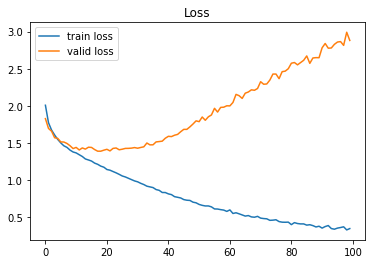

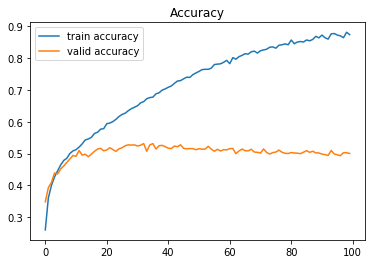

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()